In [2]:
import xarray as xr

In [3]:
dat = xr.load_dataset('/Users/tanmoysil/Desktop/data/steinmetz_2016-12-17_Cori.nc')

In [143]:
lfp = dat.lfp.to_dataframe()

lfp
brain_area_lfp trial time           
CA1            1     0.01  10.200825
                     0.02  11.945506
                     0.03   5.913591
                     0.04  -9.767260
                     0.05 -15.607686
...                              ...
VISpm          401   2.46  -3.946599
                     2.47  -1.404932
                     2.48  -2.421599
                     2.49   0.561735
                     2.50  -0.204932

[401000 rows x 1 columns]

In [145]:
dat.brain_area_lfp

<xarray.DataArray 'brain_area_lfp' (brain_area_lfp: 4)>
array(['CA1', 'VISl', 'POST', 'VISpm'], dtype=object)
Coordinates:
  * brain_area_lfp  (brain_area_lfp) object 'CA1' 'VISl' 'POST' 'VISpm'

In [76]:
dat.sel(brain_area_lfp='CA1', trial=slice(1))['lfp'].to_dataframe()

brain_area_lfp        lfp
trial time                          
1     0.01            CA1  10.200825
      0.02            CA1  11.945506
      0.03            CA1   5.913591
      0.04            CA1  -9.767260
      0.05            CA1 -15.607686
...                   ...        ...
      2.46            CA1  -9.086409
      2.47            CA1  15.988059
      2.48            CA1  12.264655
      2.49            CA1   6.339123
      2.50            CA1  13.392314

[250 rows x 2 columns]

In [155]:
CA1 = lfp.reset_index().set_index('brain_area_lfp').loc['CA1']
POST = lfp.reset_index().set_index('brain_area_lfp').loc['POST']
VISpm = lfp.reset_index().set_index('brain_area_lfp').loc['VISpm']



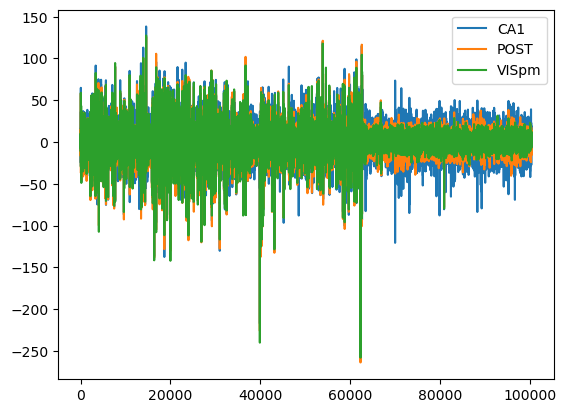

In [160]:
plt.plot(CA1.lfp.values, label='CA1')
plt.plot(POST.lfp.values, label='POST')
plt.plot(VISpm.lfp.values, label='VISpm')
plt.legend()

In [84]:
from scipy import fft

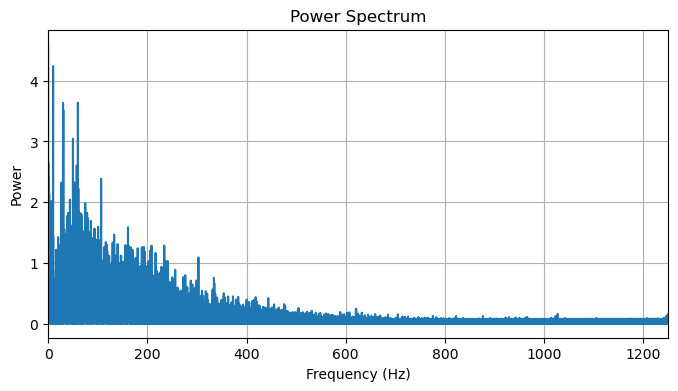

In [126]:
import numpy as np
fs = 2500
fft_result = np.fft.fft(CA1.lfp.values)
power_spectrum = np.abs(fft_result) ** 2 / (len(CA1.lfp.values) * fs)
frequencies = np.fft.fftfreq(len(CA1.lfp.values), 1/fs)
plt.figure(figsize=(8, 4))
plt.plot(frequencies, power_spectrum)
plt.title('Power Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.xlim(0, max(frequencies))
plt.grid()
plt.show()

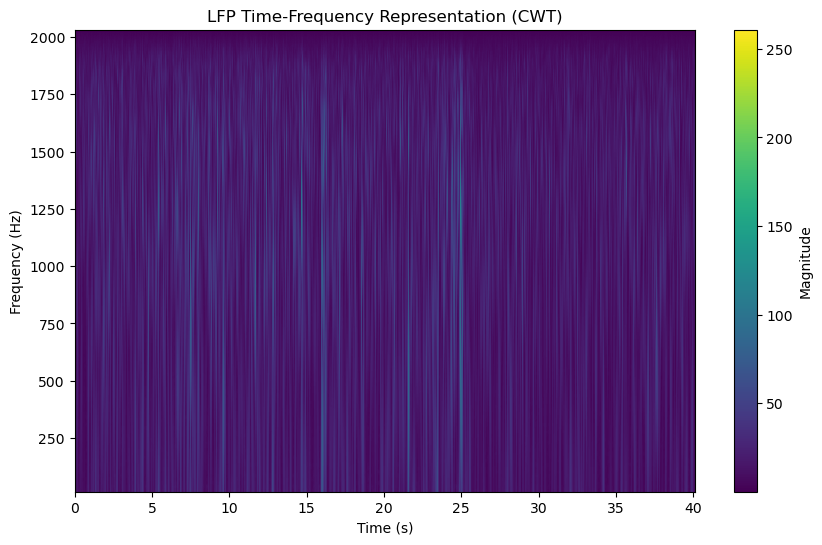

In [165]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from pywt import cwt  # Continuous Wavelet Transform

# Extract LFP data from the xarray dataset
lfp_data = CA1.lfp.values

fs = 2500  

# Define the wavelet and scales
wavelet = 'morl'  # You can choose a different wavelet, like 'morl', 'gaus1', etc.
scales = np.arange(1, 128)  # Adjust the range of scales based on your data

# Perform Continuous Wavelet Transform (CWT)
coeffs, freqs = cwt(lfp_data, scales, wavelet, sampling_period=1.0 / fs)

# Plot the time-frequency representation (CWT)
plt.figure(figsize=(10, 6))
plt.imshow(np.abs(coeffs), extent=[0, len(lfp_data) / fs, min(freqs), max(freqs)], aspect='auto', cmap='viridis')
plt.title('LFP Time-Frequency Representation (CWT)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
#plt.yscale('log')
plt.colorbar(label='Magnitude')
plt.show()


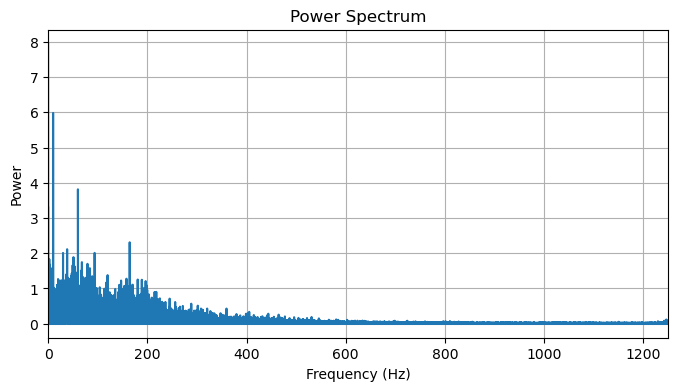

In [153]:
import numpy as np
fs = 2500
fft_result = np.fft.fft(POST.lfp.values)
power_spectrum = np.abs(fft_result) ** 2 / (len(POST.lfp.values) * fs)
frequencies = np.fft.fftfreq(len(POST.lfp.values), 1/fs)
plt.figure(figsize=(8, 4))
plt.plot(frequencies, power_spectrum)
plt.title('Power Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.xlim(0, max(frequencies))
plt.grid()
plt.show()

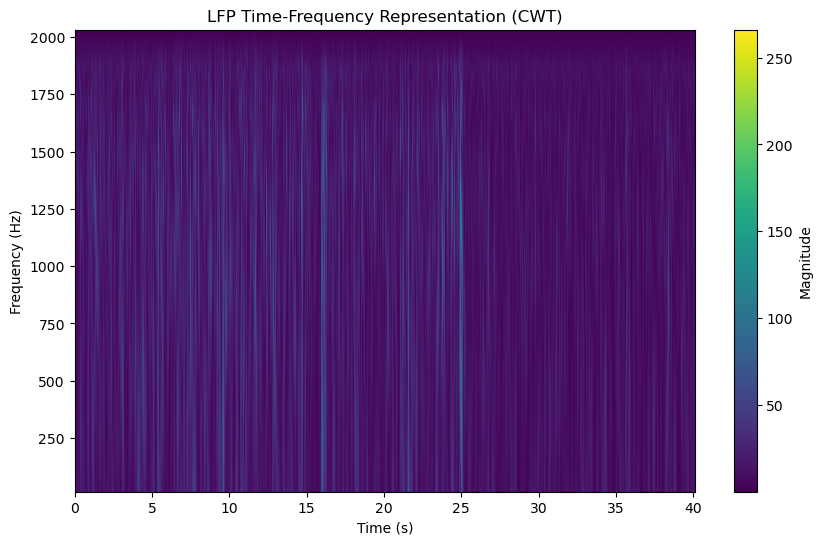

In [164]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from pywt import cwt  # Continuous Wavelet Transform

# Extract LFP data from the xarray dataset
lfp_data = POST.lfp.values

fs = 2500  

# Define the wavelet and scales
wavelet = 'morl'  # You can choose a different wavelet, like 'morl', 'gaus1', etc.
scales = np.arange(1, 128)  # Adjust the range of scales based on your data

# Perform Continuous Wavelet Transform (CWT)
coeffs, freqs = cwt(lfp_data, scales, wavelet, sampling_period=1.0 / fs)

# Plot the time-frequency representation (CWT)
plt.figure(figsize=(10, 6))
plt.imshow(np.abs(coeffs), extent=[0, len(lfp_data) / fs, min(freqs), max(freqs)], aspect='auto', cmap='viridis')
plt.title('LFP Time-Frequency Representation (CWT)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
#plt.yscale('log')
plt.colorbar(label='Magnitude')
plt.show()


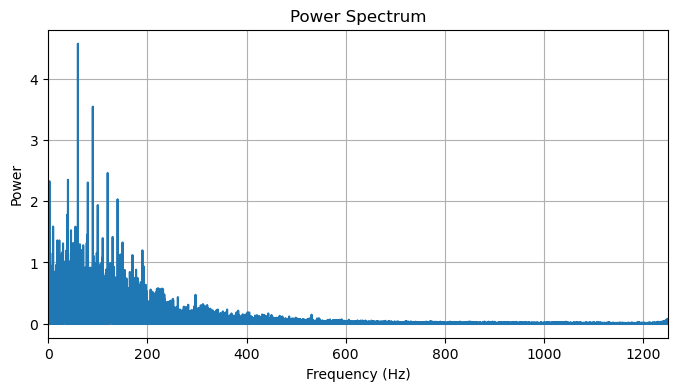

In [161]:
import numpy as np
fs = 2500
fft_result = np.fft.fft(VISpm.lfp.values)
power_spectrum = np.abs(fft_result) ** 2 / (len(VISpm.lfp.values) * fs)
frequencies = np.fft.fftfreq(len(VISpm.lfp.values), 1/fs)
plt.figure(figsize=(8, 4))
plt.plot(frequencies, power_spectrum)
plt.title('Power Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.xlim(0, max(frequencies))
plt.grid()
plt.show()

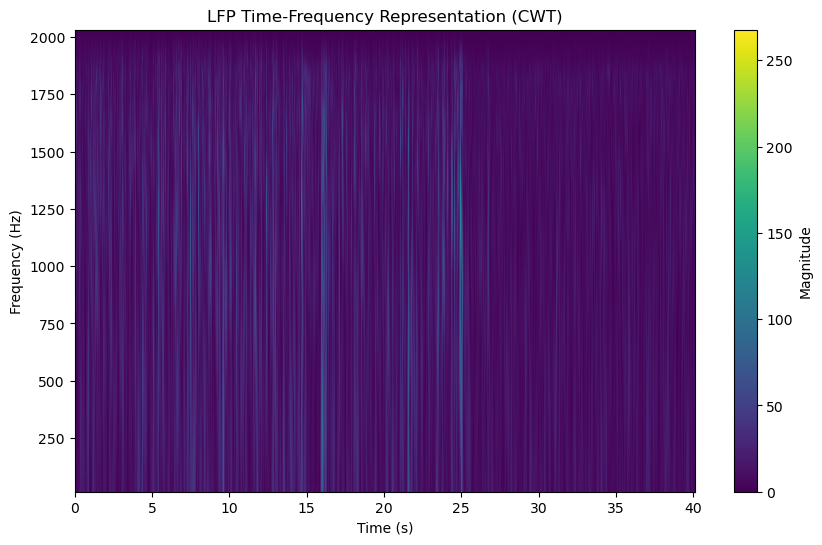

In [163]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from pywt import cwt  # Continuous Wavelet Transform

# Extract LFP data from the xarray dataset
lfp_data = VISpm.lfp.values

fs = 2500  

# Define the wavelet and scales
wavelet = 'morl'  # You can choose a different wavelet, like 'morl', 'gaus1', etc.
scales = np.arange(1, 128)  # Adjust the range of scales based on your data

# Perform Continuous Wavelet Transform (CWT)
coeffs, freqs = cwt(lfp_data, scales, wavelet, sampling_period=1.0 / fs)

# Plot the time-frequency representation (CWT)
plt.figure(figsize=(10, 6))
plt.imshow(np.abs(coeffs), extent=[0, len(lfp_data) / fs, min(freqs), max(freqs)], aspect='auto', cmap='viridis')
plt.title('LFP Time-Frequency Representation (CWT)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
#plt.yscale('log')
plt.colorbar(label='Magnitude')
plt.show()
